In [22]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [24]:
#Training Model Data
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')

#Testing Model Data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

# Popping from csv file will remove 'survived' col from dftrain
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

#print(y_train)
dftrain.head()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [25]:
#Will print complete contents of row 0 in dftrain
print(dftrain.loc[1])

# Will show if survived or not from training outcome
print(y_train.loc[1])

sex                      female
age                        38.0
n_siblings_spouses            1
parch                         0
fare                    71.2833
class                     First
deck                          C
embark_town           Cherbourg
alone                         n
Name: 1, dtype: object
1


In [26]:
# Will print all values from the fare col
print(dftrain["fare"])

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.4583
        ...   
622    10.5000
623     7.0500
624    30.0000
625    23.4500
626     7.7500
Name: fare, Length: 627, dtype: float64


In [27]:
# Gives info such as std dev, mean, min, max, etc
dftrain.describe()


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [28]:
# Gives (rows, cols)
print(dftrain.shape)

(627, 9)


<AxesSubplot:>

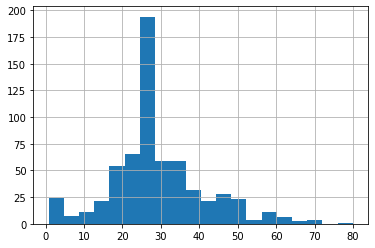

In [29]:
# Creates histogram with 20 bins regarding age distribution
dftrain.age.hist(bins=20)

<AxesSubplot:>

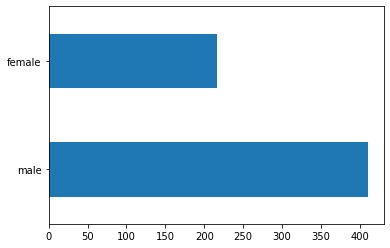

In [30]:
# Creates horizontal bar graph with sex distribution
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

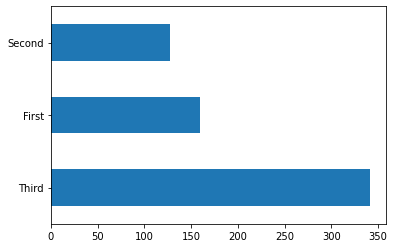

In [31]:
# Class distribution chart
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% Survived')

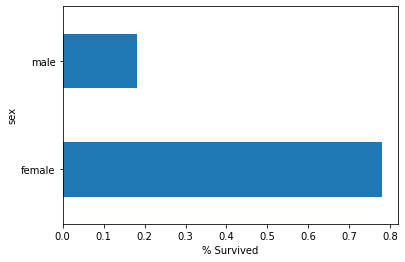

In [32]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% Survived')

In [33]:
# Seperating Categorical and Numerical Data
CATEGORICAL_COLS = ['sex', 'n_siblings_spouses', 'parch', 'class',
                    'deck', 'embark_town', 'alone']
NUMERICAL_COLS = ['age', 'fare']

feature_cols = []

for feature_name in CATEGORICAL_COLS:
    vocabulary = dftrain[feature_name].unique()
    feature_cols.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERICAL_COLS:
        feature_cols.append(tf.feature_column.numeric_column(feature_name, dtype= tf.float32))
        
print(feature_cols)


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [34]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function(): # Creates input function to be used
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # Creates tf.data.Dataset object
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [35]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  
  print('A batch of class:', feature_batch['class'].numpy())
  
  print('A batch of Labels:', label_batch.numpy())

Some feature keys: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']
A batch of class: [b'Third' b'Third' b'First' b'First' b'Third' b'Third' b'First' b'Second'
 b'Second' b'Second']
A batch of Labels: [1 0 1 1 0 0 0 1 1 0]


In [42]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_cols)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result) # Prints accuracy of model  

{'accuracy': 0.7537879, 'accuracy_baseline': 0.625, 'auc': 0.8322008, 'auc_precision_recall': 0.77572465, 'average_loss': 0.48171815, 'label/mean': 0.375, 'loss': 0.4741867, 'precision': 0.6603774, 'prediction/mean': 0.39226937, 'recall': 0.7070707, 'global_step': 200}


In [47]:
# To find specific accuracies for individuals
# 
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4])
print(result[4]['probabilities'][1])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jossu\AppData\Local\Temp\tmpe34gnwza\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.2334119
